# Neural Networks

Objective: To implement different configurations of neural network to approximate the function y = 0.2x^4 + 2x^3 + 0.1x^2 + 10 where x is between -1 and 1 inclusive.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

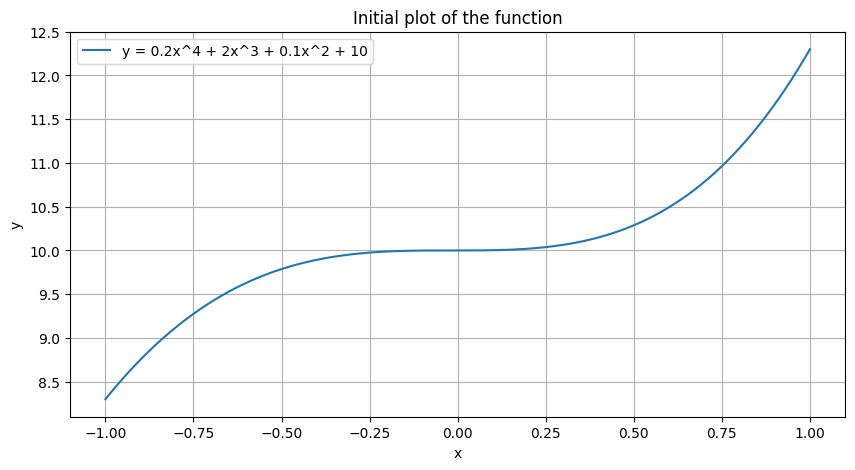

In [ ]:
def function_to_approximate(x):
    return 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10


x_values = np.linspace(-1, 1, 30000)
y_values = function_to_approximate(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label="y = 0.2x^4 + 2x^3 + 0.1x^2 + 10")
plt.title("Initial plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def get_dataset(argument=None):
    # Generate x and y
    x_data = np.linspace(-1, 1, 30000)
    y_data = function_to_approximate(x_data)

    # Combine x and y data
    data = np.column_stack((x_data, y_data))

    # Shuffle the data if argument equals 'shuffle'
    if argument == "shuffle":
        np.random.shuffle(data)

    return data

In [ ]:
def train_val_test_split(data, train_ratio, val_ratio, test_ratio):
    # Ensure that the sum of ratios is equal to 1
    if train_ratio + val_ratio + test_ratio != 1:
        raise ValueError("The sum of the ratios must be equal to 1.")

    # Split sizes
    total_size = data.shape[0]
    train_end = int(train_ratio * total_size)
    val_end = int((train_ratio + val_ratio) * total_size)

    # Split the data
    train_data = data[:train_end]
    val_data = data[train_end:val_end]
    test_data = data[val_end:]

    return train_data, val_data, test_data

In [ ]:
def scale_data(train, val=None, test=None):
    min_val = train.min(axis=0)
    max_val = train.max(axis=0)

    train_scaled = (train - min_val) / (max_val - min_val)
    val_scaled, test_scaled = None, None

    # If validation data is provided, scale it using the training min and max
    if val is not None:
        val_scaled = (val - min_val) / (max_val - min_val)

    # If test data is provided, scale it using the training min and max
    if test is not None:
        test_scaled = (test - min_val) / (max_val - min_val)

    # Return the scaled datasets and the scaling parameters
    return train_scaled, val_scaled, test_scaled, min_val, max_val

In [ ]:
def calculate_regression_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted, squared=False)
    r2 = r2_score(actual, predicted)

    metrics = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

    return metrics

In [ ]:
def build_model(structure, activation):
    # Helper function to build a neural network structure
    model = Sequential()
    model.add(keras.Input(shape=(1,)))  # x is the only feature

    for units in structure:
        model.add(Dense(units, activation=activation))

    model.add(Dense(1, activation="linear"))  # Output layer for regression
    model.compile(loss="mse", optimizer=Adam())
    return model

Epoch 1/20
750/750 [==============================] - 15s 6ms/step - loss: 21.4793 - val_loss: 0.1314
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0867 - val_loss: 0.0558
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0393 - val_loss: 0.0239
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0161 - val_loss: 0.0103
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0020 - val_loss: 0.00

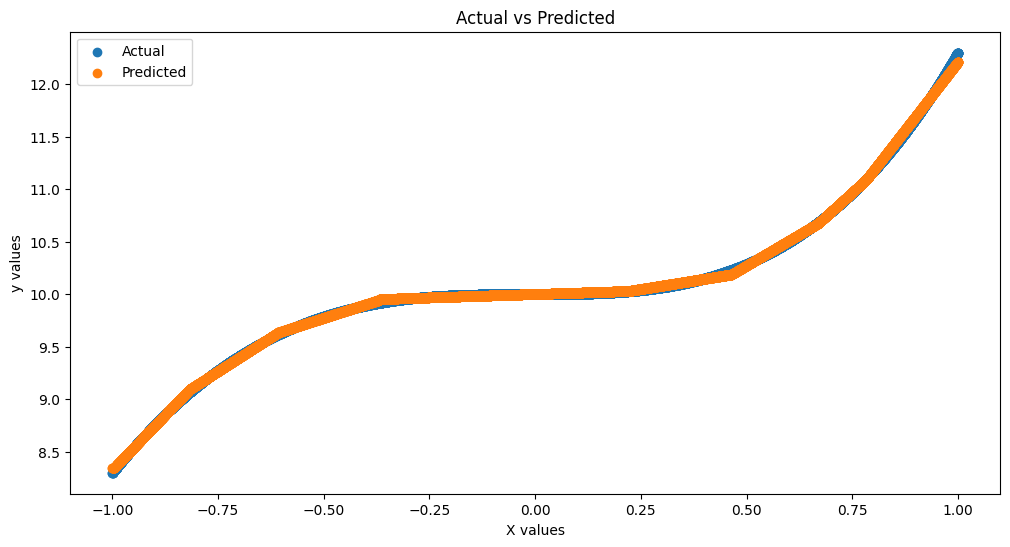

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 33.5689 - val_loss: 0.1109
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0793 - val_loss: 0.0658
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0569 - val_loss: 0.0476
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0437 - val_loss: 0.0388
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0371 - val_loss: 0.0331
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0303 - val_loss: 0.0250
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0206 - val_loss: 0.0152
Epoch 8/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0122 - val_loss: 0.0089
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0054 - val_loss: 0.004

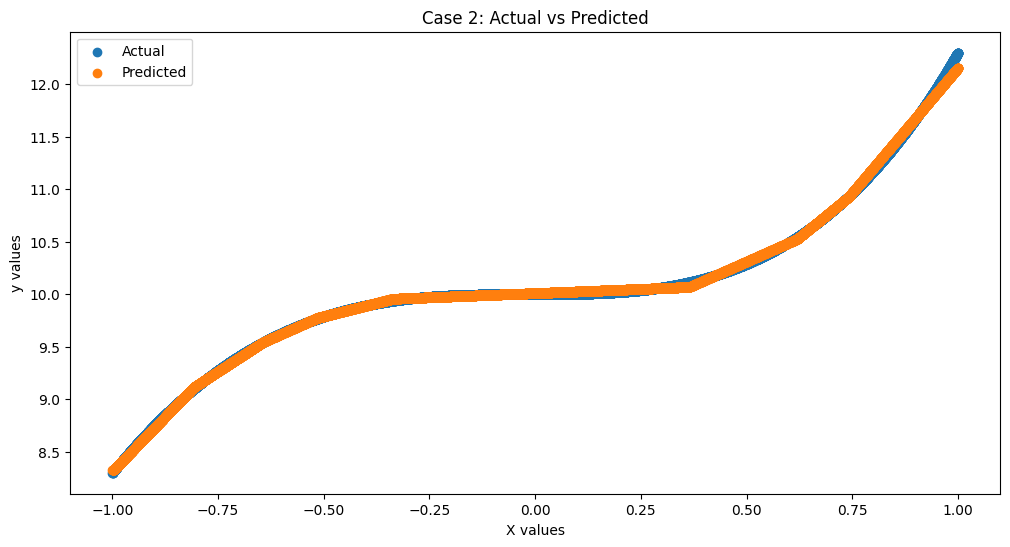

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 42.7107 - val_loss: 17.8684
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 9.2877 - val_loss: 3.7672
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 1.8576 - val_loss: 0.8443
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.6615 - val_loss: 0.5687
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.5792 - val_loss: 0.5513
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3450 - val_loss: 0.2396
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2036 - val_loss: 0.1708
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1454 - val_loss: 0.0979
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0626 - val_loss: 0.0346
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0240 - val_loss: 0.01

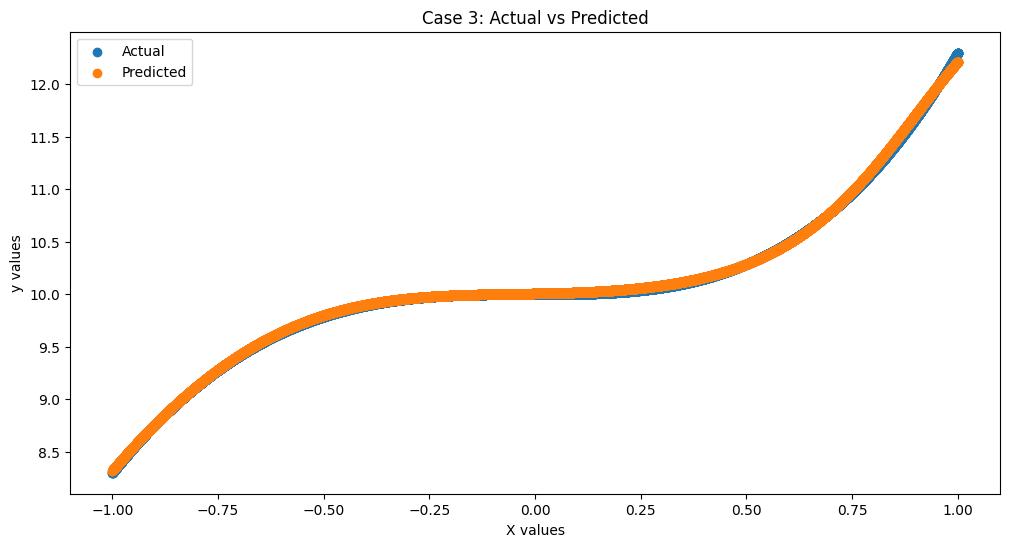

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 0.0897 - val_loss: 0.0376
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0364 - val_loss: 0.0364
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 8/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0362 - val_loss: 0.0364

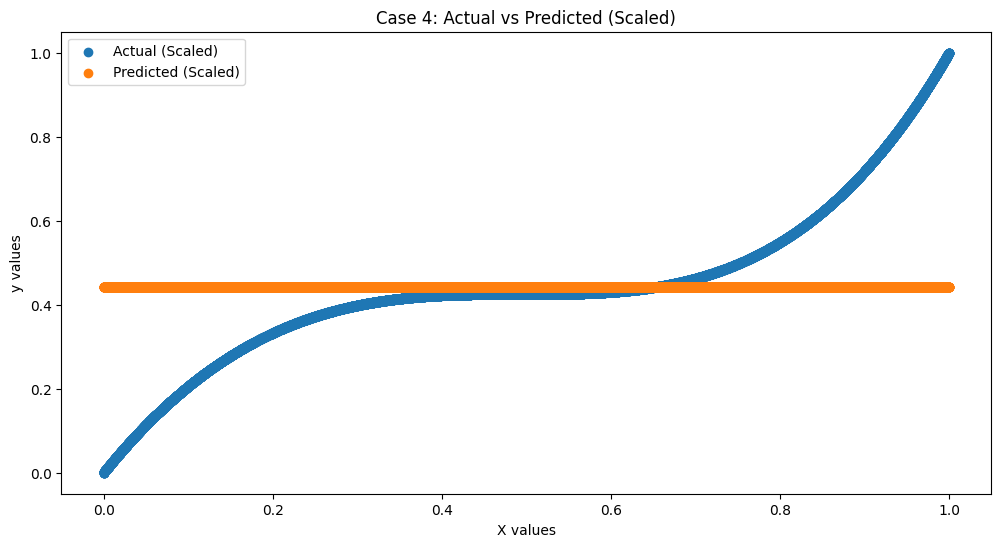

Epoch 1/20
750/750 [==============================] - 6s 6ms/step - loss: 0.0111 - val_loss: 0.0069
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0020 - val_loss: 4.3800e-04
Epoch 8/20
750/750 [==============================] - 4s 6ms/step - loss: 4.1383e-04 - val_loss: 4.5251e-04
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 3.8061e-04 - val_loss: 3.2511e-04
Epoch 10/20
750/750 [==============================] - 3s 4ms/step - loss: 3.283

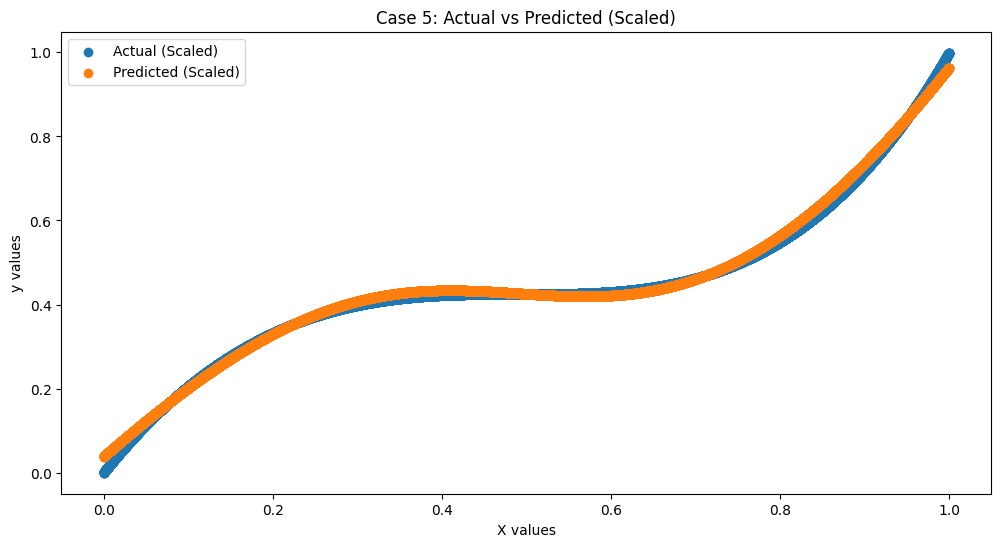

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 80.1089 - val_loss: 85.3422
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 67.6935 - val_loss: 72.6896
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 56.6539 - val_loss: 61.3616
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 46.8470 - val_loss: 51.2304
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 38.1634 - val_loss: 42.1960
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 30.5233 - val_loss: 34.1916
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 23.8745 - val_loss: 27.1766
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 18.1688 - val_loss: 21.1003
Epoch 9/20
750/750 [==============================] - 4s 5ms/step - loss: 13.3666 - val_loss: 15.9329
Epoch 10/20
750/750 [==============================] - 5s 7ms/step - loss: 9.4281 

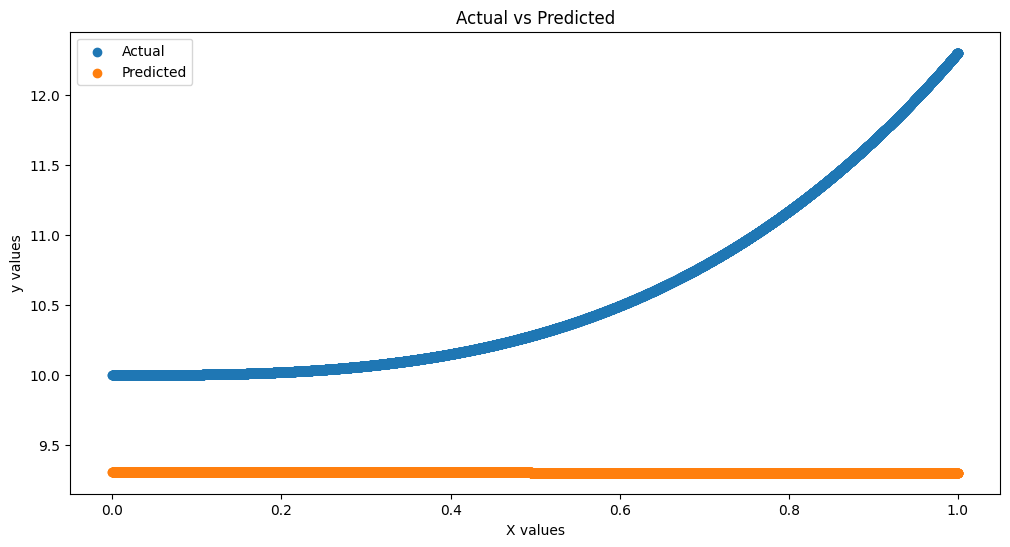

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 34.8255 - val_loss: 18.7592
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 2.1530 - val_loss: 12.9813
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 1.8118 - val_loss: 10.1631
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 1.4457 - val_loss: 7.3364
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 1.0468 - val_loss: 4.3258
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.6563 - val_loss: 1.9280
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3304 - val_loss: 0.4944
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1182 - val_loss: 0.0167
Epoch 9/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0291 - val_loss: 0.2238
Epoch 10/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0104 - val_loss: 0.

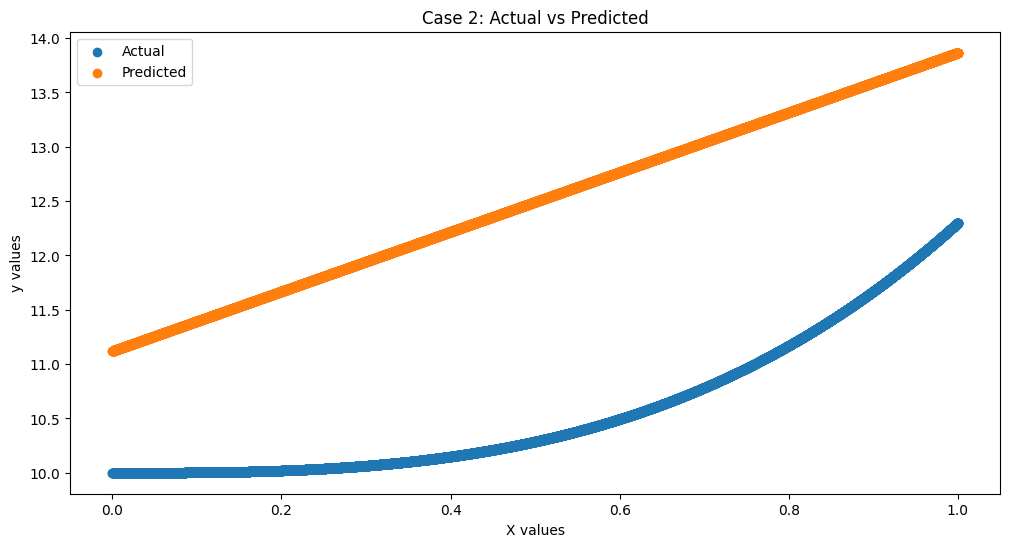

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 30.9112 - val_loss: 17.6988
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 5.9517 - val_loss: 4.0991
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.8520 - val_loss: 1.0043
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2387 - val_loss: 0.5162
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2138 - val_loss: 0.4698
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2134 - val_loss: 0.4591
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2133 - val_loss: 0.4564
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2131 - val_loss: 0.4667
Epoch 9/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2131 - val_loss: 0.4608
Epoch 10/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2130 - val_loss: 0.47

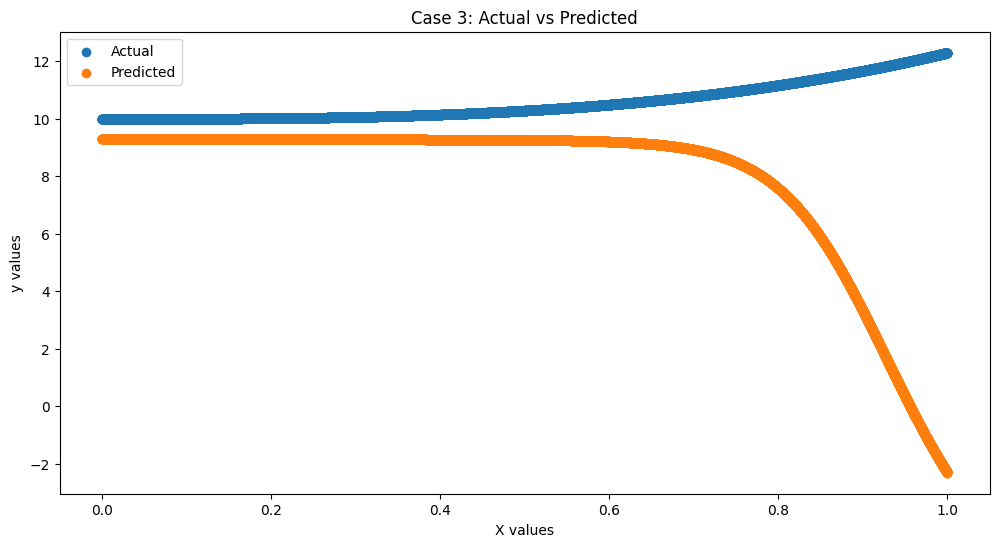

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.0562 - val_loss: 0.1130
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0015 - val_loss: 0.0713
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 1.6629e-04 - val_loss: 0.0433
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 8.0285e-05 - val_loss: 0.0355
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 5.9775e-05 - val_loss: 0.0343
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 4.8904e-05 - val_loss: 0.0316
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 4.4130e-05 - val_loss: 0.0265
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 3.8646e-05 - val_loss: 0.0270
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 3.6202e-05 - val_loss: 0.0259
Epoch 10/20
750/750 [==============================] - 4s 5ms/step - los

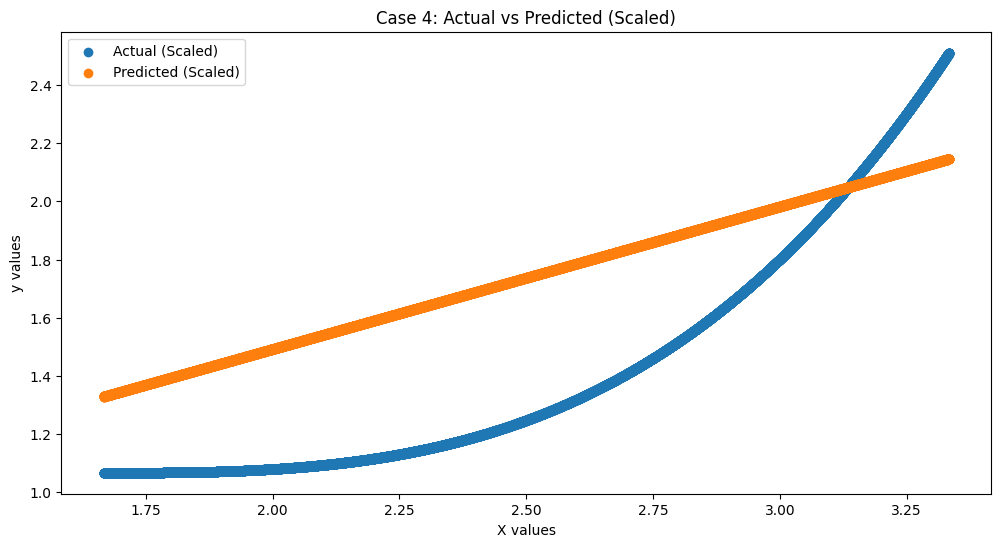

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.0214 - val_loss: 7.1298e-05
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 4.5034e-05 - val_loss: 7.9878e-05
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 3.7656e-05 - val_loss: 1.1771e-04
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 2.9874e-05 - val_loss: 2.0700e-04
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 2.3319e-05 - val_loss: 4.0807e-04
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 1.7527e-05 - val_loss: 5.3750e-04
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 1.3501e-05 - val_loss: 9.1167e-04
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 9.7798e-06 - val_loss: 0.0012
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 7.0506e-06 - val_loss: 0.0015
Epoch 10/20
750/750 [===================

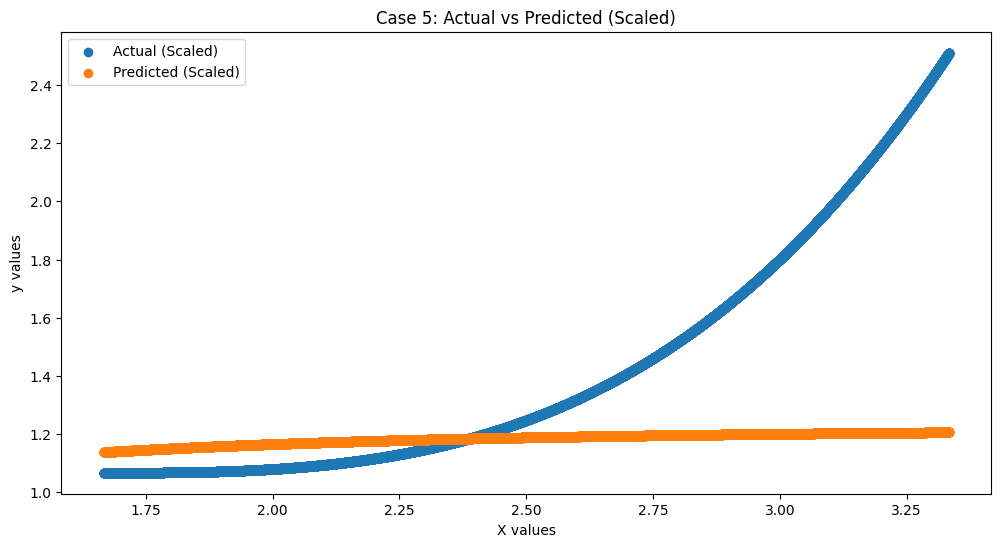

In [ ]:
##### Case 1 Shuffled:
# Step 1: Generate and shuffle the data (assuming get_dataset function is defined)
dataset = get_dataset(argument="shuffle")

# Step 2: Split the data (assuming train_val_test_split function is defined)
train_ratio, val_ratio, test_ratio = 0.3, 0.2, 0.5
train_data, val_data, test_data = train_val_test_split(
    dataset, train_ratio, val_ratio, test_ratio
)

# Prepare the dataset for training
X_train, y_train = train_data[:, 0], train_data[:, 1]
X_val, y_val = val_data[:, 0], val_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Step 3: Build the model (assuming build_model function is defined)
model = build_model([12, 8, 4], "relu")

# Step 4: Train the model
history = model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12
)

# Step 5: Evaluate the model on the test data
y_pred = model.predict(X_test)
metrics = calculate_regression_metrics(
    y_test, y_pred
)  # assuming calculate_regression_metrics function is defined

# Print out the metrics
print(metrics)

# Step 6: Plot the graphs of actual vs. predicted data for the test set
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 2 Shuffled
# Step 1: Generate and shuffle the data (assuming get_dataset function is defined)
dataset = get_dataset(argument="shuffle")

# Step 2: Split the data (assuming train_val_test_split function is defined)
train_ratio, val_ratio, test_ratio = 0.3, 0.2, 0.5
train_data, val_data, test_data = train_val_test_split(
    dataset, train_ratio, val_ratio, test_ratio
)

# Prepare the dataset for training
X_train, y_train = train_data[:, 0], train_data[:, 1]
X_val, y_val = val_data[:, 0], val_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Build the neural network for Case 2
model_case_2 = build_model([24], "relu")

# Train the model for Case 2
history_case_2 = model_case_2.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12
)

# Evaluate the model for Case 2 on the test data
y_pred_case_2 = model_case_2.predict(X_test)
metrics_case_2 = calculate_regression_metrics(y_test, y_pred_case_2)

# Print out the metrics for Case 2
print("Case 2 Metrics:", metrics_case_2)

# Plot the graphs of actual vs. predicted data for the test set for Case 2
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(
    X_test, y_pred_case_2.flatten(), label="Predicted"
)  # Flatten y_pred if it's not already a 1D array
plt.title("Case 2: Actual vs Predicted")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 3 shuffled
# Step 1: Generate and shuffle the data (assuming get_dataset function is defined)
dataset = get_dataset(argument="shuffle")

# Step 2: Split the data into train, validation, and test sets with the given ratios
train_ratio, val_ratio, test_ratio = 0.3, 0.2, 0.5
train_data, val_data, test_data = train_val_test_split(
    dataset, train_ratio, val_ratio, test_ratio
)

# Prepare the dataset for training
X_train, y_train = train_data[:, 0], train_data[:, 1]
X_val, y_val = val_data[:, 0], val_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Reshape the data for training
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Step 3: Build the model with Structure 1 using 'tanh' activation function
model_case_3 = build_model([12, 8, 4], "tanh")

# Step 4: Train the model for Case 3
history_case_3 = model_case_3.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12
)

# Step 5: Evaluate the model for Case 3 on the test data
y_pred_case_3 = model_case_3.predict(X_test)
metrics_case_3 = calculate_regression_metrics(y_test, y_pred_case_3)

# Print out the metrics for Case 3
print("Case 3 Metrics:", metrics_case_3)

# Step 6: Plot the graphs of actual vs. predicted data for the test set for Case 3
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(
    X_test, y_pred_case_3.flatten(), label="Predicted"
)  # Flatten y_pred if it's not already a 1D array
plt.title("Case 3: Actual vs Predicted")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 4 Shuffled
# Assuming the provided get_dataset, train_val_test_split, and scale_data functions are already defined

# Generate and shuffle the dataset
dataset = get_dataset(argument="shuffle")

# Split the dataset into training, validation, and test sets
train_data, val_data, test_data = train_val_test_split(dataset, 0.3, 0.2, 0.5)

# Scale the datasets using the custom scale_data function
train_scaled, val_scaled, test_scaled, train_min, train_max = scale_data(
    train_data[:, 0:1], val_data[:, 0:1], test_data[:, 0:1]
)

# Extract features and target from scaled training data
X_train_scaled, y_train_scaled = train_scaled[:, 0], train_data[:, 1]
# Apply the same scaling to the target variable y
y_train_scaled = (y_train_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled validation data
X_val_scaled, y_val_scaled = val_scaled[:, 0], val_data[:, 1]
y_val_scaled = (y_val_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled test data
X_test_scaled, y_test_scaled = test_scaled[:, 0], test_data[:, 1]
y_test_scaled = (y_test_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Build the neural network model using Structure 1 with ReLU activation
model = build_model([12, 8, 4], "relu")

# Train the model
history = model.fit(
    X_train_scaled.reshape(-1, 1),
    y_train_scaled,
    validation_data=(X_val_scaled.reshape(-1, 1), y_val_scaled),
    epochs=20,
    batch_size=12,
)

# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled.reshape(-1, 1)).flatten()

# Inverse transform the scaled predictions to compare with original data
y_pred = (
    y_pred_scaled * (train_data[:, 1].max() - train_data[:, 1].min())
    + train_data[:, 1].min()
)

# Calculate metrics
metrics = calculate_regression_metrics(y_test_scaled, y_pred_scaled)

# Print the metrics
print("Case 4 Metrics:", metrics)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(X_test_scaled, y_test_scaled, label="Actual (Scaled)")
plt.scatter(X_test_scaled, y_pred_scaled, label="Predicted (Scaled)")
plt.title("Case 4: Actual vs Predicted (Scaled)")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 5 Shuffled
# Use the same get_dataset, train_val_test_split, and scale_data functions from before

# Generate and shuffle the dataset
dataset = get_dataset(argument="shuffle")

# Split the dataset into training, validation, and test sets
train_data, val_data, test_data = train_val_test_split(dataset, 0.3, 0.2, 0.5)

# Scale the datasets using the custom scale_data function
train_scaled, val_scaled, test_scaled, train_min, train_max = scale_data(
    train_data[:, 0:1], val_data[:, 0:1], test_data[:, 0:1]
)

# Extract features and target from scaled training data
X_train_scaled, y_train_scaled = train_scaled[:, 0], train_data[:, 1]
# Apply the same scaling to the target variable y
y_train_scaled = (y_train_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled validation data
X_val_scaled, y_val_scaled = val_scaled[:, 0], val_data[:, 1]
y_val_scaled = (y_val_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled test data
X_test_scaled, y_test_scaled = test_scaled[:, 0], test_data[:, 1]
y_test_scaled = (y_test_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Build the neural network model using Structure 1 with tanh activation
model = build_model([12, 8, 4], "tanh")

# Train the model
history = model.fit(
    X_train_scaled.reshape(-1, 1),
    y_train_scaled,
    validation_data=(X_val_scaled.reshape(-1, 1), y_val_scaled),
    epochs=20,
    batch_size=12,
)

# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled.reshape(-1, 1)).flatten()

# Inverse transform the scaled predictions to compare with original data
y_pred = (
    y_pred_scaled * (train_data[:, 1].max() - train_data[:, 1].min())
    + train_data[:, 1].min()
)

# Calculate metrics
metrics = calculate_regression_metrics(y_test_scaled, y_pred_scaled)

# Print the metrics
print("Case 5 Metrics:", metrics)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(X_test_scaled, y_test_scaled, label="Actual (Scaled)")
plt.scatter(X_test_scaled, y_pred_scaled, label="Predicted (Scaled)")
plt.title("Case 5: Actual vs Predicted (Scaled)")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 1 Not Shuffled
# Step 1: Generate and shuffle the data (assuming get_dataset function is defined)
dataset = get_dataset()

# Step 2: Split the data (assuming train_val_test_split function is defined)
train_ratio, val_ratio, test_ratio = 0.3, 0.2, 0.5
train_data, val_data, test_data = train_val_test_split(
    dataset, train_ratio, val_ratio, test_ratio
)

# Prepare the dataset for training
X_train, y_train = train_data[:, 0], train_data[:, 1]
X_val, y_val = val_data[:, 0], val_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Step 3: Build the model (assuming build_model function is defined)
model = build_model([12, 8, 4], "relu")

# Step 4: Train the model
history = model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12
)

# Step 5: Evaluate the model on the test data
y_pred = model.predict(X_test)
metrics = calculate_regression_metrics(
    y_test, y_pred
)  # assuming calculate_regression_metrics function is defined

# Print out the metrics
print(metrics)

# Step 6: Plot the graphs of actual vs. predicted data for the test set
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 2 Not Shuffled
# Step 1: Generate and shuffle the data (assuming get_dataset function is defined)
dataset = get_dataset(argument="none")

# Step 2: Split the data (assuming train_val_test_split function is defined)
train_ratio, val_ratio, test_ratio = 0.3, 0.2, 0.5
train_data, val_data, test_data = train_val_test_split(
    dataset, train_ratio, val_ratio, test_ratio
)

# Prepare the dataset for training
X_train, y_train = train_data[:, 0], train_data[:, 1]
X_val, y_val = val_data[:, 0], val_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Build the neural network for Case 2
model_case_2 = build_model([24], "relu")

# Train the model for Case 2
history_case_2 = model_case_2.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12
)

# Evaluate the model for Case 2 on the test data
y_pred_case_2 = model_case_2.predict(X_test)
metrics_case_2 = calculate_regression_metrics(y_test, y_pred_case_2)

# Print out the metrics for Case 2
print("Case 2 Metrics:", metrics_case_2)

# Plot the graphs of actual vs. predicted data for the test set for Case 2
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(
    X_test, y_pred_case_2.flatten(), label="Predicted"
)  # Flatten y_pred if it's not already a 1D array
plt.title("Case 2: Actual vs Predicted")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 3 Not Shuffled
# Step 1: Generate and shuffle the data (assuming get_dataset function is defined)
dataset = get_dataset(argument="none")

# Step 2: Split the data into train, validation, and test sets with the given ratios
train_ratio, val_ratio, test_ratio = 0.3, 0.2, 0.5
train_data, val_data, test_data = train_val_test_split(
    dataset, train_ratio, val_ratio, test_ratio
)

# Prepare the dataset for training
X_train, y_train = train_data[:, 0], train_data[:, 1]
X_val, y_val = val_data[:, 0], val_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Reshape the data for training
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Step 3: Build the model with Structure 1 using 'tanh' activation function
model_case_3 = build_model([12, 8, 4], "tanh")

# Step 4: Train the model for Case 3
history_case_3 = model_case_3.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=12
)

# Step 5: Evaluate the model for Case 3 on the test data
y_pred_case_3 = model_case_3.predict(X_test)
metrics_case_3 = calculate_regression_metrics(y_test, y_pred_case_3)

# Print out the metrics for Case 3
print("Case 3 Metrics:", metrics_case_3)

# Step 6: Plot the graphs of actual vs. predicted data for the test set for Case 3
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(
    X_test, y_pred_case_3.flatten(), label="Predicted"
)  # Flatten y_pred if it's not already a 1D array
plt.title("Case 3: Actual vs Predicted")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 4 Not Shuffled
# Assuming the provided get_dataset, train_val_test_split, and scale_data functions are already defined

# Generate and shuffle the dataset
dataset = get_dataset(argument="none")

# Split the dataset into training, validation, and test sets
train_data, val_data, test_data = train_val_test_split(dataset, 0.3, 0.2, 0.5)

# Scale the datasets using the custom scale_data function
train_scaled, val_scaled, test_scaled, train_min, train_max = scale_data(
    train_data[:, 0:1], val_data[:, 0:1], test_data[:, 0:1]
)

# Extract features and target from scaled training data
X_train_scaled, y_train_scaled = train_scaled[:, 0], train_data[:, 1]
# Apply the same scaling to the target variable y
y_train_scaled = (y_train_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled validation data
X_val_scaled, y_val_scaled = val_scaled[:, 0], val_data[:, 1]
y_val_scaled = (y_val_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled test data
X_test_scaled, y_test_scaled = test_scaled[:, 0], test_data[:, 1]
y_test_scaled = (y_test_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Build the neural network model using Structure 1 with ReLU activation
model = build_model([12, 8, 4], "relu")

# Train the model
history = model.fit(
    X_train_scaled.reshape(-1, 1),
    y_train_scaled,
    validation_data=(X_val_scaled.reshape(-1, 1), y_val_scaled),
    epochs=20,
    batch_size=12,
)

# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled.reshape(-1, 1)).flatten()

# Inverse transform the scaled predictions to compare with original data
y_pred = (
    y_pred_scaled * (train_data[:, 1].max() - train_data[:, 1].min())
    + train_data[:, 1].min()
)

# Calculate metrics
metrics = calculate_regression_metrics(y_test_scaled, y_pred_scaled)

# Print the metrics
print("Case 4 Metrics:", metrics)

# Plot actual vs predicted (scaled)
plt.figure(figsize=(12, 6))
plt.scatter(X_test_scaled, y_test_scaled, label="Actual (Scaled)")
plt.scatter(X_test_scaled, y_pred_scaled, label="Predicted (Scaled)")
plt.title("Case 4: Actual vs Predicted (Scaled)")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


##### Case 5 Not Shuffled
# Use the same get_dataset, train_val_test_split, and scale_data functions from before

# Generate and shuffle the dataset
dataset = get_dataset(argument="none")

# Split the dataset into training, validation, and test sets
train_data, val_data, test_data = train_val_test_split(dataset, 0.3, 0.2, 0.5)

# Scale the datasets using the custom scale_data function
train_scaled, val_scaled, test_scaled, train_min, train_max = scale_data(
    train_data[:, 0:1], val_data[:, 0:1], test_data[:, 0:1]
)

# Extract features and target from scaled training data
X_train_scaled, y_train_scaled = train_scaled[:, 0], train_data[:, 1]
# Apply the same scaling to the target variable y
y_train_scaled = (y_train_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled validation data
X_val_scaled, y_val_scaled = val_scaled[:, 0], val_data[:, 1]
y_val_scaled = (y_val_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Extract features and target from scaled test data
X_test_scaled, y_test_scaled = test_scaled[:, 0], test_data[:, 1]
y_test_scaled = (y_test_scaled - train_data[:, 1].min()) / (
    train_data[:, 1].max() - train_data[:, 1].min()
)

# Build the neural network model using Structure 1 with tanh activation
model = build_model([12, 8, 4], "tanh")

# Train the model
history = model.fit(
    X_train_scaled.reshape(-1, 1),
    y_train_scaled,
    validation_data=(X_val_scaled.reshape(-1, 1), y_val_scaled),
    epochs=20,
    batch_size=12,
)

# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled.reshape(-1, 1)).flatten()

# Inverse transform the scaled predictions to compare with original data
y_pred = (
    y_pred_scaled * (train_data[:, 1].max() - train_data[:, 1].min())
    + train_data[:, 1].min()
)

# Calculate metrics
metrics = calculate_regression_metrics(y_test_scaled, y_pred_scaled)

# Print the metrics
print("Case 5 Metrics:", metrics)

# Plot actual vs predicted (scaled)
plt.figure(figsize=(12, 6))
plt.scatter(X_test_scaled, y_test_scaled, label="Actual (Scaled)")
plt.scatter(X_test_scaled, y_pred_scaled, label="Predicted (Scaled)")
plt.title("Case 5: Actual vs Predicted (Scaled)")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()

### Solving the XOR problem by using a neural network. The neural network is designed by all required parameters, such as the number of layers, activation functions, loss function, etc.

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.biases_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.biases_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward propagation
        self.hidden_sum = (
            np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        )
        self.hidden_output = self.sigmoid(self.hidden_sum)
        self.output_sum = (
            np.dot(self.hidden_output, self.weights_hidden_output)
            + self.biases_hidden_output
        )
        self.output = self.sigmoid(self.output_sum)
        return self.output

    def backward(self, X, y, output):
        # Backpropagation
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(
            self.hidden_output
        )

        self.weights_hidden_output += self.hidden_output.T.dot(self.output_delta)
        self.biases_hidden_output += np.sum(self.output_delta, axis=0, keepdims=True)
        self.weights_input_hidden += X.T.dot(self.hidden_delta)
        self.biases_input_hidden += np.sum(self.hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return self.forward(X)


# XOR truth table inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize neural network
input_size = 2
hidden_size = 2  # I initialized the hidden layers to 2 which provided a perfect output
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
epochs = 10000
nn.train(X, y, epochs)

# Test the model
predicted_output = nn.predict(X)
print("Predicted Output:")
print(predicted_output.round())

Predicted Output:
[[0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
print(predicted_output)

[[0.01678158]
 [0.98539981]
 [0.98539249]
 [0.01745695]]


In [ ]:
# Test the neural network for XOR table:

# Define the model
model = Sequential()

# Add input layer (implicitly) and the first hidden layer with tanh activation
model.add(Dense(units=2, input_dim=2, activation="relu"))

# Add output layer with sigmoid activation
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32")
y = np.array([[0], [1], [1], [0]], "float32")

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model
print(model.predict(X))

1/1 [==============================] - 0s 72ms/step
[[0.5       ]
 [0.50000006]
 [0.5       ]
 [0.50000006]]
